In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn import over_sampling

In [74]:
df_ = pd.read_excel('E Commerce Dataset.xlsx')
cek = df_.copy()

In [75]:
#Ubah tipe data
df_['Churn'] = df_['Churn'].astype(bool)
df_['Complain'] = df_['Complain'].astype(bool)

# Duplicate
Berdasarkan kolom CustomnerID dapat diketahui bahwa jumlah nilai uniknya sebanyak jumlah data yang dimiliki. Sehingga dapat disimpulkan bahwa satu baris mewakili satu customer.
Maka pada dataset yang dimiliki dapat disimpulkan bahwa tidak ada duplikat data.

In [76]:
cek.duplicated().sum()

0

In [77]:
df_ = df_.drop(['CustomerID', 'OrderCount'], axis = 1)
df = df_.copy()

Order count di drop karena berdasarkan EDA di stage 1 merupakan kolom yang berkorelasi >0.7 dengan kolom couponused.

# Missing Value

In [78]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [79]:
dataawal = len(cek)
drop_dataa = cek.dropna(inplace=True, subset=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderCount', 'OrderAmountHikeFromlastYear', 'CouponUsed',  'DaySinceLastOrder'  ])
drop_data = len(cek)
jumlah_drop = dataawal - drop_data
print ("Persentase data yang didrop = ", (jumlah_drop/ dataawal) * 100)

Persentase data yang didrop =  32.96625222024866


### Dropna
Jika data missing value di drop secara keseluruhan, data yang dibuang sebesar 32,96 % dari data keseluruhan. Karena data yang dimiliki tidak terlalu banyak metode ini kurang tepat.

### Imputation
Karena berdasarkan EDA yang telah dilakukan, dataset yang dimiliki kolomnya memiliki banyak outlier dan data yang missing value sebanyak 32,966%, jadi metode yang tepat untuk mengatasi missing value yaitu dengan melakukan imputation berdasarkan median. Sedangkan mean kurang cocok karena tidak robost terhadapat outlier. 

In [80]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

Missing data pada kolom `Hour Spend On App` diisi dengan mode, karena data memiliki distribusi multibimodal.

In [81]:
mode_value = df['HourSpendOnApp'].mode()[0] # hitung nilai modus
df['HourSpendOnApp'].fillna(mode_value, inplace=True) # isi nilai kosong dengan nilai modus
df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Outlier
Metode yang digunakan yaitu menggunakan metode Z-score.

In [82]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 
       'NumberOfAddress',  'OrderAmountHikeFromlastYear',
       'CouponUsed',  'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5466


In [83]:
# df_out_iqr = df.copy()
# print(f'Jumlah baris sebelum memfilter outlier: {len(df_out_iqr)}')

# filtered_entries = np.array([True] * len(df_out_iqr))
# for col in ['Tenure', 'WarehouseToHome',
#        'HourSpendOnApp', 'NumberOfDeviceRegistered', 
#        'NumberOfAddress',  'OrderAmountHikeFromlastYear',
#        'CouponUsed',  'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']:
#     Q1 = df_out_iqr[col].quantile(0.25)
#     Q3 = df_out_iqr[col].quantile(0.75)
#     IQR = Q3 - Q1
#     low_limit = Q1 - (IQR * 1.5)
#     high_limit = Q3 + (IQR * 1.5)

#     filtered_entries = ((df_out_iqr[col] >= low_limit) & (df_out_iqr[col] <= high_limit)) & filtered_entries
    
# df_out_iqr = df_out_iqr[filtered_entries]

# print(f'Jumlah baris setelah memfilter outlier: {len(df_out_iqr)}')

# Feature Extraction
Pada kolom preferredpaymentmode

In [84]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [85]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [86]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Fashion',
       'Others', 'Grocery'], dtype=object)

In [115]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Cash on Delivery','Cash')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Credit Card','NonCash')             
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Debit Card','NonCash')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('E wallet','NonCash')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('UPI','NonCash')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Credit Card','NonCash')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('CC','NonCash')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Credit Card','NonCash')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('COD','Cash')

In [116]:
df['PreferredPaymentMode'].unique()

array(['NonCash', 'Cash'], dtype=object)

In [89]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].str.replace('Phone','Mobile Phone')
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].str.replace('Mobile Mobile Phone','Mobile Phone')
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

In [90]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].str.replace('Mobile','Mobile Phone')
df['PreferedOrderCat'] = df['PreferedOrderCat'].str.replace('Mobile Phone Phone','Mobile Phone')   
df['PreferedOrderCat'] = df['PreferedOrderCat'].str.replace('Laptop & Accessory','Electronic')
df['PreferedOrderCat'] = df['PreferedOrderCat'].str.replace('Mobile Phone','Electronic') 
df['PreferedOrderCat'].unique()


array(['Electronic', 'Fashion', 'Others', 'Grocery'], dtype=object)

In [91]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Divorced','Single')   
df['MaritalStatus'].unique()

array(['Single', 'Married'], dtype=object)

# Feature Encoding

In [92]:
num = df[['Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 
       'NumberOfAddress',  'OrderAmountHikeFromlastYear',
       'CouponUsed',  'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore',]].copy()
kat = df[[ 'CityTier', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'Complain',
       'PreferedOrderCat', 'MaritalStatus',  'Churn']].copy()

## Label Encoding

In [93]:
kat['Churn'] = kat['Churn'].astype('category').cat.codes
kat['Complain'] = kat['Complain'].astype('category').cat.codes 

## One hot enocoding

In [94]:
kat = pd.get_dummies(kat, columns=[ 'CityTier', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'])

In [95]:
df_joinn = kat.join(num)  #Menggabungkan data kategori + numerik agar memudahkan untuk split train dan test
df_joinn.sample(3)

,Complain,Churn,CityTier_1,CityTier_2,CityTier_3,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash,PreferredPaymentMode_NonCash,Gender_Female,...,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CashbackAmount,SatisfactionScore
2060,1,0,1,0,0,1,0,0,1,1,...,6.0,6.0,2.0,1,2,13.0,1.0,2.0,154.88,4
2487,1,0,1,0,0,0,1,0,1,1,...,18.0,11.0,2.0,5,2,14.0,0.0,4.0,157.69,5
3092,0,0,0,0,1,0,1,1,0,1,...,4.0,19.0,3.0,4,2,12.0,4.0,5.0,190.77,3


In [96]:
df_joinn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Complain                           5466 non-null   int8   
 1   Churn                              5466 non-null   int8   
 2   CityTier_1                         5466 non-null   uint8  
 3   CityTier_2                         5466 non-null   uint8  
 4   CityTier_3                         5466 non-null   uint8  
 5   PreferredLoginDevice_Computer      5466 non-null   uint8  
 6   PreferredLoginDevice_Mobile Phone  5466 non-null   uint8  
 7   PreferredPaymentMode_Cash          5466 non-null   uint8  
 8   PreferredPaymentMode_NonCash       5466 non-null   uint8  
 9   Gender_Female                      5466 non-null   uint8  
 10  Gender_Male                        5466 non-null   uint8  
 11  PreferedOrderCat_Electronic        5466 non-null   uint8

# Memisahkan Fitur dan Target

In [97]:
 fitur = df_joinn.copy()
X = fitur.drop('Churn', axis=1) 
y = fitur['Churn'].values

# Memisahkan data untuk train dan test

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Cek jumlah data training per class
print(pd.Series(y_train).value_counts())

0    3630
1     742
dtype: int64


In [100]:
#Cek jumlah data testing per class
print(pd.Series(y_test).value_counts())

0    910
1    184
dtype: int64


In [101]:
len(X_train) #jumlah toal data training

4372

In [102]:
len(X_test) #jumlah data testing

1094

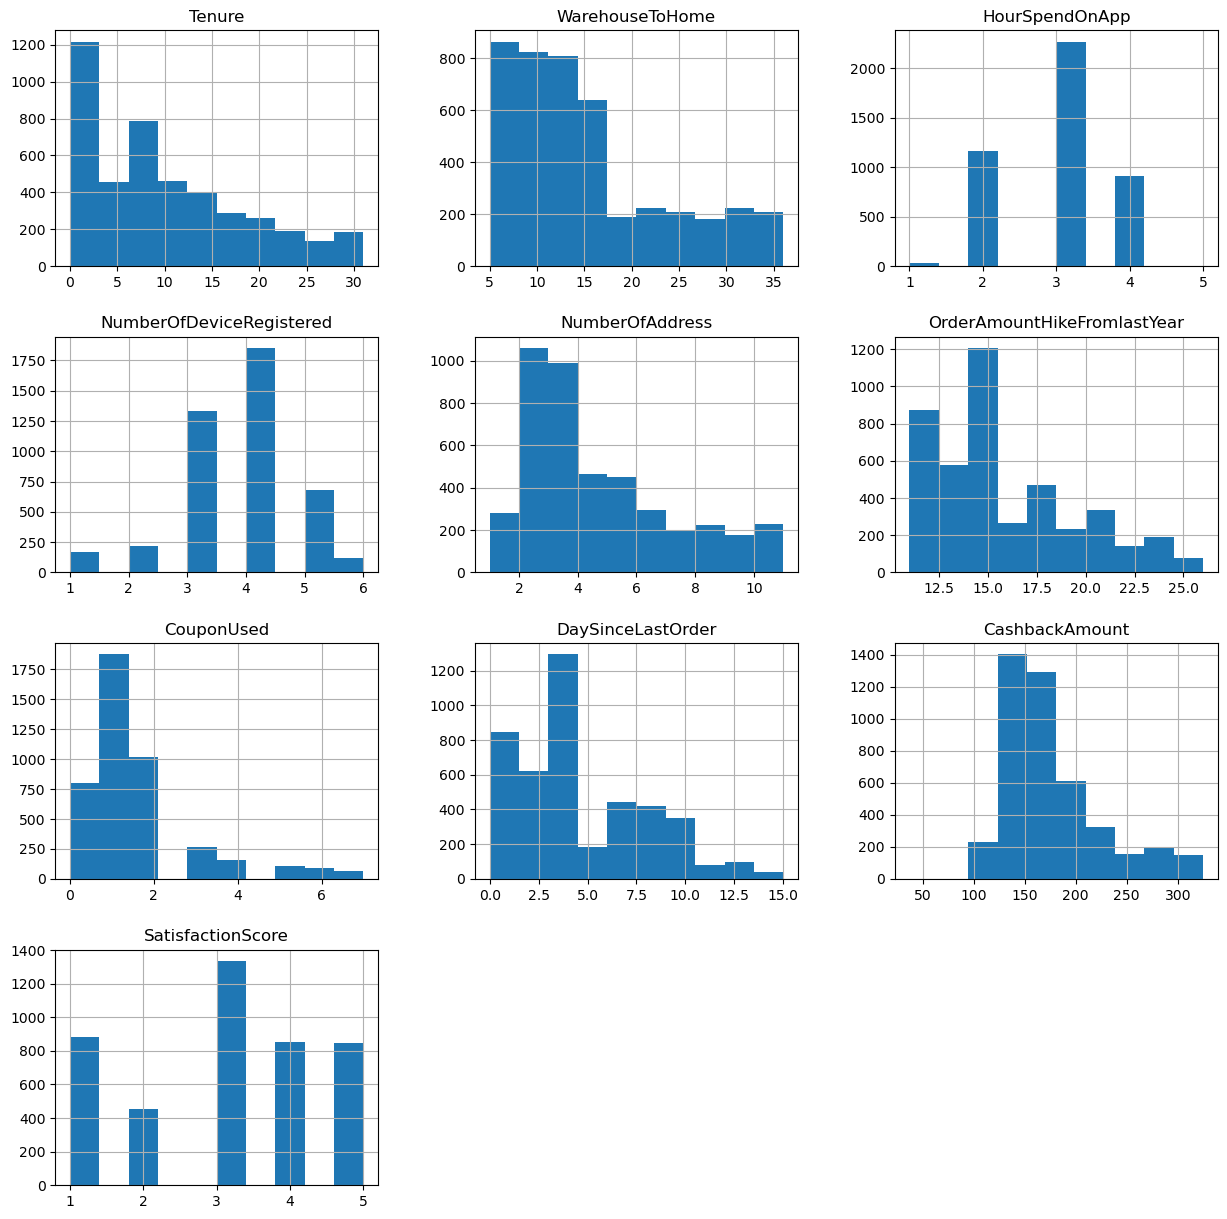

In [103]:
sebelum = X_train[['Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 
       'NumberOfAddress',  'OrderAmountHikeFromlastYear',
       'CouponUsed',  'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']].copy()

sebelum.hist(bins=10, figsize=(15, 15))
plt.savefig("Sebelum Quantile Transformer")

# Feature Transformation

In [104]:
num_quantile = X_train[['Tenure', 'WarehouseToHome', #quantile hanya dilakukan pada kolom numerik
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 
       'NumberOfAddress',  'OrderAmountHikeFromlastYear',
       'CouponUsed',  'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore']].copy()

In [105]:
quantile = QuantileTransformer(output_distribution='normal')
train_quantile = pd.DataFrame(quantile.fit_transform(num_quantile), columns=num_quantile.columns)

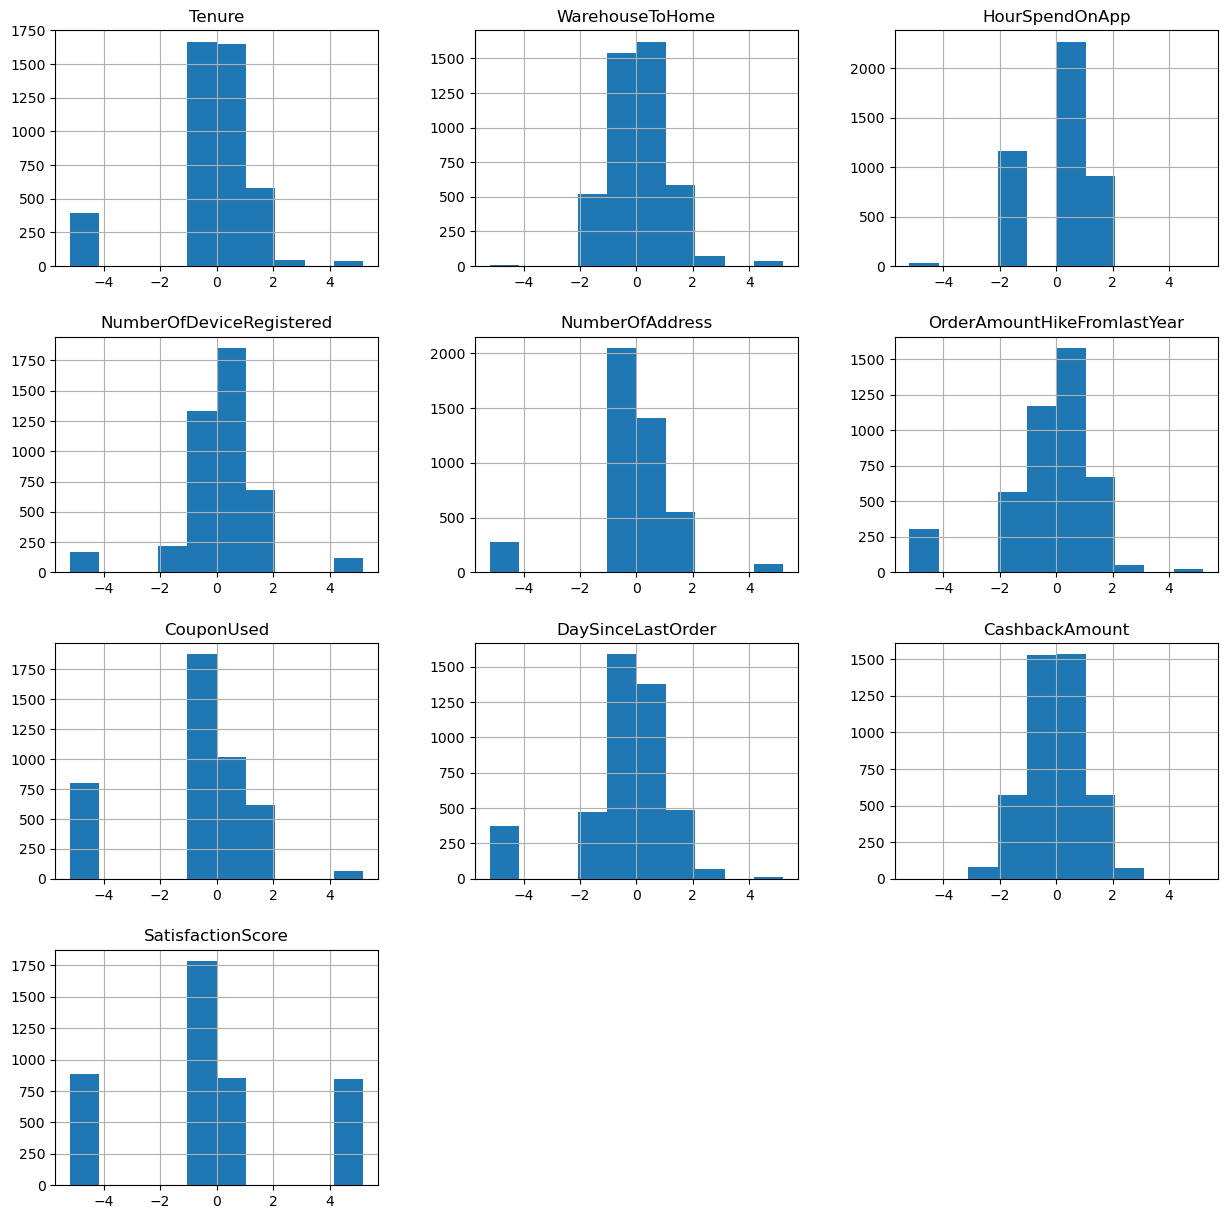

In [106]:
train_quantile.hist(bins=10, figsize=(15, 15))

# Menambahkan judul dan label pada plot
#plt.suptitle("Distribusi Seluruh Kolom Numerik setelah Quantile Transformer")
plt.savefig("Setelah Quantile Transformer")
plt.show()

In [107]:
X_train = train_quantile.copy()

# Handle Imbalance Class

In [ ]:
# Cek jumlah data training per class
print(pd.Series(y_train).value_counts())

0    3630
1     742
dtype: int64


In [ ]:
len(X_train)

4372

In [ ]:
len(X_test)

1094

In [ ]:
X_train_ , y_train_ = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train_).value_counts())

0    3630
1    3630
dtype: int64


In [ ]:
X_train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       7260 non-null   float64
 1   WarehouseToHome              7260 non-null   float64
 2   HourSpendOnApp               7260 non-null   float64
 3   NumberOfDeviceRegistered     7260 non-null   float64
 4   NumberOfAddress              7260 non-null   float64
 5   OrderAmountHikeFromlastYear  7260 non-null   float64
 6   CouponUsed                   7260 non-null   float64
 7   DaySinceLastOrder            7260 non-null   float64
 8   CashbackAmount               7260 non-null   float64
 9   SatisfactionScore            7260 non-null   float64
dtypes: float64(10)
memory usage: 567.3 KB


In [ ]:
len(y_train_)

7260